In [0]:
import matplotlib.pyplot as plt
import numpy as np
# custom function for image visualization
def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(12, 10))
    plt.imshow(image, cmap=cmap_type)  
    plt.title(title)
    plt.axis('off')
    plt.show()

# custom function for image visualization with corners
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

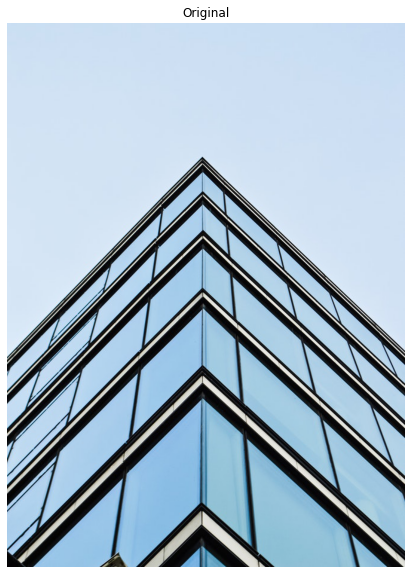

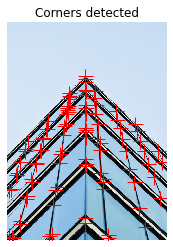

In [6]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
from skimage.io import imread

# load the image
building_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/4e1b6a178fd6d36488339a440959b4639cf54623/corners_building_top.jpg')

# Convert image from RGB-3 to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

With a min_distance setted to 2, we detect a total 98 corners in the image.
With a min_distance setted to 40, we detect a total 36 corners in the image.


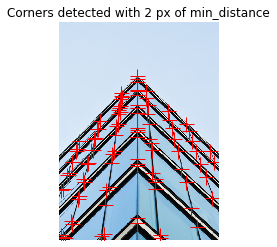

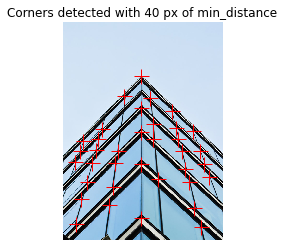

In [7]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance setted to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance setted to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

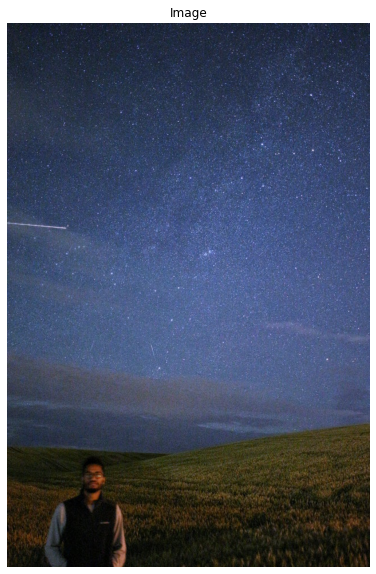

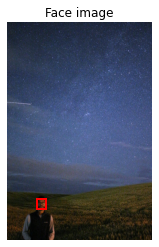

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


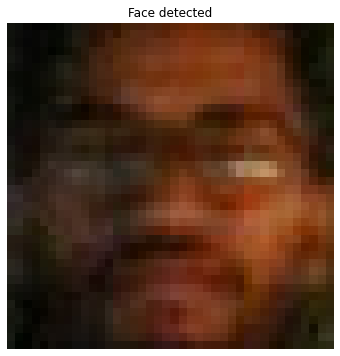

In [21]:
from skimage import data
from skimage.feature import Cascade
from matplotlib import patches

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# load the image
night_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/5a23aa7fc1c16805a714b3e25f1b1fea5e55e324/face_det3.jpg')
show_image(night_image)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

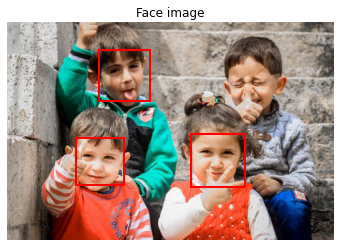

{'r': 170, 'c': 281, 'width': 82, 'height': 82}


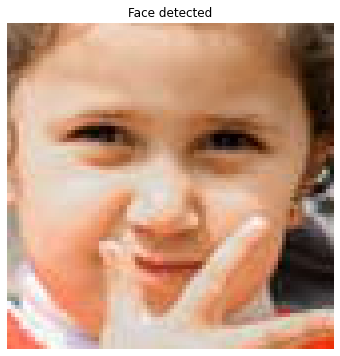

{'r': 176, 'c': 105, 'width': 73, 'height': 73}


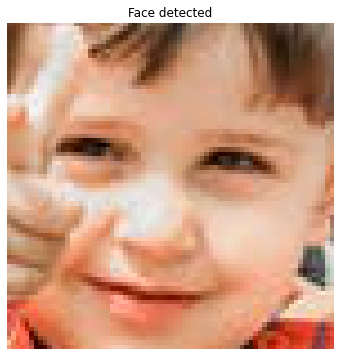

{'r': 42, 'c': 140, 'width': 78, 'height': 78}


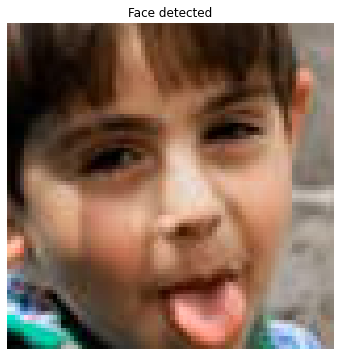

In [18]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# load an image of multiple people
friends_image=imread('https://github.com/juberrahman/Pattern-Recognition/blob/master/Image%20Processing/images/pexels-photo-2105199.jpeg?raw=true')

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

Apply superpixel segmentation and obtain the segments a.k.a. labels using slic()<br> 
* Obtain the segmented image using label2rgb(), 
* passing the segments and profile_image.
* Detect the faces, using the detector with multi scale method.

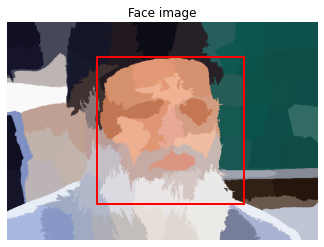

{'r': 79, 'c': 207, 'width': 338, 'height': 338}


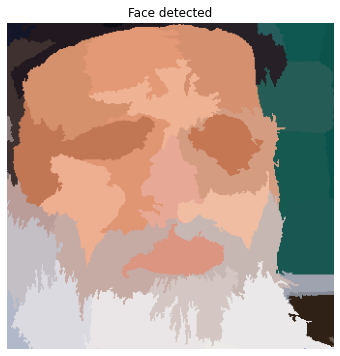

In [20]:
from skimage.segmentation import slic
from skimage.color import label2rgb
# Obtain the segmentation with default 100 regions
profile_image=imread('https://github.com/juberrahman/Pattern-Recognition/blob/master/Image%20Processing/images/Abdul-Sattar-Edhi-2.jpg?raw=true')
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

## Add Privacy protection 

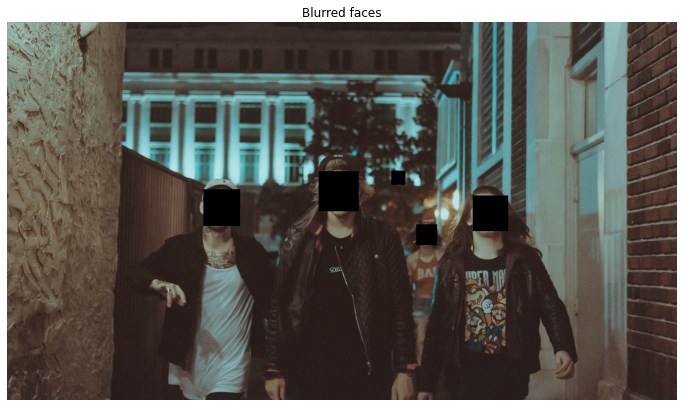

In [29]:
''' Extracts the face from the image using the coordinates of the detected image and blur the faces to protect privacy '''
from skimage.filters import gaussian
def getFaceRectangle(d):
  # X and Y starting points of the face rectangle  
  x, y  = d['r'], d['c']  
  # The width and height of the face rectangle  
  width, height = d['r'] + d['width'], d['c'] + d['height']
  # Extract the detected face
  face= group_image[ x:width, y:height]    
  return face

def mergeBlurryFace(original, gaussian_image):
  # X and Y starting points of the face rectangle
  x, y  = d['r'], d['c']   
  # The width and height of the face rectangle
  width, height = d['r'] + d['width'],  d['c'] + d['height']
  original[ x:width, y:height] =  gaussian_image
  return original

# load a group image
group_image=imread('https://assets.datacamp.com/production/repositories/4470/datasets/f531207e00d10992a3a02f87c7e488baba043209/face_det25.jpg')
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10,10), max_size=(100, 100))
# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma = 8)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face) 
show_image(resulting_image, "Blurred faces")